In [1]:
conda install geopandas

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: - 

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import UK Co-benefit data to pandas dataframes

#data 1

path1 = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/UK_Cobenefit_Atlas_Original_files/Data/Level_1.csv'

data1 = pd.read_csv(path1)

data1

#lookups

path_lookups = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/UK_Cobenefit_Atlas_Original_files/Lookups/Lookups.csv'
lookups = pd.read_csv(path_lookups)

lookups



,small_area,population,households,local_authority,nation
0,E01000001,1721,838,City of London,Eng/Wales
1,E01000002,1608,824,City of London,Eng/Wales
2,E01000003,1826,1017,City of London,Eng/Wales
3,E01000005,1605,480,City of London,Eng/Wales
4,E01000006,1833,554,Barking and Dagenham,Eng/Wales
...,...,...,...,...,...
46421,W01002036,1500,773,The Vale of Glamorgan,Eng/Wales
46422,W01002037,1070,565,The Vale of Glamorgan,Eng/Wales
46423,W01002038,1280,580,The Vale of Glamorgan,Eng/Wales
46424,W01002039,1865,668,The Vale of Glamorgan,Eng/Wales


In [16]:
# Merge data1 with lookups dataframe

data1_merged = pd.merge(data1, lookups, on = 'small_area', how = 'left')

print(data1_merged.info())
print(data1_merged.head())

print(data1_merged.value_counts('nation'))


# Filter dataset for Scotland

scotland_level1 = data1_merged[data1_merged['nation'] =='Scotland']
print(scotland_level1.value_counts('nation'))
print(scotland_level1['sum'].max())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46426 entries, 0 to 46425
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   small_area         46426 non-null  object 
 1   air_quality        46426 non-null  float64
 2   congestion         46426 non-null  float64
 3   dampness           46426 non-null  float64
 4   diet_change        46426 non-null  float64
 5   excess_cold        46426 non-null  float64
 6   excess_heat        46426 non-null  float64
 7   hassle_costs       46423 non-null  float64
 8   noise              46426 non-null  float64
 9   physical_activity  46426 non-null  float64
 10  road_repairs       46426 non-null  float64
 11  road_safety        46426 non-null  float64
 12  sum                46423 non-null  float64
 13  population         46426 non-null  int64  
 14  households         46426 non-null  int64  
 15  local_authority    46426 non-null  object 
 16  nation             464

In [5]:
# Filter data1_merged for the following 'co-benefit_type's: dampness, excess_cold, excess_heat, air_quality, diet_change, physical_activity. New dataframe name is data1_merged_UK_f1

data1_merged_UK_f1 = data1_merged[['small_area', 'air_quality', 'dampness', 'diet_change', 'excess_cold', 'excess_heat', 'physical_activity', 'sum', 'population', 'households', 'local_authority', 'nation']] 

print(data1_merged_UK_f1.info())

data1_merged_UK_f1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46426 entries, 0 to 46425
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   small_area         46426 non-null  object 
 1   air_quality        46426 non-null  float64
 2   dampness           46426 non-null  float64
 3   diet_change        46426 non-null  float64
 4   excess_cold        46426 non-null  float64
 5   excess_heat        46426 non-null  float64
 6   physical_activity  46426 non-null  float64
 7   sum                46423 non-null  float64
 8   population         46426 non-null  int64  
 9   households         46426 non-null  int64  
 10  local_authority    46426 non-null  object 
 11  nation             46426 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 4.3+ MB
None


,small_area,air_quality,dampness,diet_change,excess_cold,excess_heat,physical_activity,sum,population,households,local_authority,nation
0,E01000001,1.216085,0.001297,0.128954,0.024851,2.700000e-07,2.843469,2.769611,1721,838,City of London,Eng/Wales
1,E01000002,1.136227,0.001281,0.120487,0.021732,2.390000e-07,2.144986,2.075657,1608,824,City of London,Eng/Wales
2,E01000003,1.292019,0.002419,0.136821,0.038085,4.090000e-07,3.880668,3.817350,1826,1017,City of London,Eng/Wales
3,E01000005,1.131235,0.000606,0.120262,0.009138,1.320000e-07,0.575438,0.486609,1605,480,City of London,Eng/Wales
4,E01000006,1.296972,0.010851,0.137346,0.154956,2.770000e-06,1.562526,1.647567,1833,554,Barking and Dagenham,Eng/Wales
...,...,...,...,...,...,...,...,...,...,...,...,...
46421,W01002036,1.058057,0.016909,0.112394,0.203134,2.540000e-06,1.184668,1.064885,1500,773,The Vale of Glamorgan,Eng/Wales
46422,W01002037,0.754742,0.011401,0.080175,0.167922,1.990000e-06,0.857943,0.794853,1070,565,The Vale of Glamorgan,Eng/Wales
46423,W01002038,0.958027,0.013615,0.095910,0.215595,3.060000e-06,0.684390,0.796556,1280,580,The Vale of Glamorgan,Eng/Wales
46424,W01002039,1.395875,0.015488,0.139744,0.276023,4.420000e-06,0.946736,1.067280,1865,668,The Vale of Glamorgan,Eng/Wales


0        POLYGON ((532105.313 182010.574, 532162.492 18...
1        POLYGON ((532634.498 181926.016, 532619.142 18...
2        POLYGON ((532135.139 182198.131, 532158.251 18...
3        POLYGON ((533808.019 180767.774, 533649.038 18...
4        POLYGON ((545122.05 184314.931, 545271.85 1841...
                               ...                        
46421    POLYGON ((317734.975 172707.277, 317873.188 17...
46422    POLYGON ((319033.58 172604.209, 319009.059 172...
46423    POLYGON ((306385.001 168776, 306363.001 168614...
46424    POLYGON ((306820.272 166519.139, 306844.281 16...
46425    POLYGON ((311966.752 167551.668, 312068.511 16...
Name: geometry, Length: 46426, dtype: geometry
0        POLYGON ((532160 181870, 532250 181900, 532280...
1        POLYGON ((532620 181850, 532750 181790, 532670...
2        POLYGON ((532160 182150, 532250 182180, 532290...
3        POLYGON ((533650 180730, 533600 180820, 533580...
4        POLYGON ((545270 184180, 545300 184160, 545230...
         

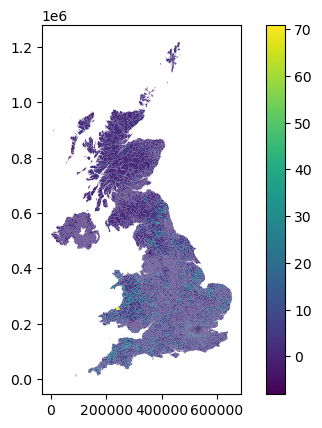

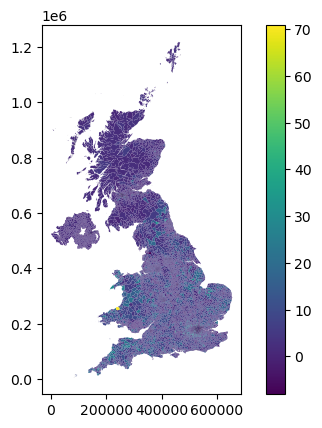

In [6]:

# Read shp file and merge with data1_merged_UK_f1 dataframe with new file name is gpd_UK_map_level1

path_shp = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/UK_Cobenefit_Atlas_Original_files/Shapefile/small_areas_british_grid.shp'

gpd_data = gpd.read_file(path_shp)

gpd_UK_map_level1 = pd.merge(gpd_data, data1_merged_UK_f1, on = 'small_area', how = 'right')

gpd_UK_map_level1

gpd_UK_map_level1.plot('sum', legend = True, cmap = 'viridis')



# Reduce precision of geometry of gpd_UK_map_level1 dataset to reduce the size of the file

print(gpd_UK_map_level1['geometry'])

gpd_UK_map_level1['geometry'] = gpd_UK_map_level1['geometry'].set_precision(10, mode = 'valid_output')

print(gpd_UK_map_level1['geometry'])

gpd_UK_map_level1.plot('sum', legend = True, cmap = 'viridis')


#To write to GeoJSON

gpd_UK_map_level1.to_file("UK_map_level1.json", driver="GeoJSON")
